In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

Logistic regression default

In [ ]:
max_iter=10000
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

dropout_f1_score_values = []
for index in range(0,15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    model = LogisticRegression(max_iter=max_iter)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_f1_score_values.append(dropout_f1_score)

print("Default (with enrolled)")
print("Dropout F1 Score:", np.mean(dropout_f1_score_values))
print("Dropout F1 Score var:", np.var(dropout_f1_score_values))
statistics, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon", pvalue)

print(classification_report(y_test, preds,target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred=preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Logistic regression default")
plt.show()

Logistic regression without enrolled

In [ ]:
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

dropout_f1_score_values = []

for index in range(0,15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    model = LogisticRegression(max_iter=max_iter)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_f1_score_values.append(dropout_f1_score)


print("Default (without enrolled)")
print("Dropout F1 Score:", np.mean(dropout_f1_score_values))
print("Dropout F1 Score var:", np.var(dropout_f1_score_values))
statistics, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon", pvalue)

print(classification_report(y_test, preds,target_names=le.classes_))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Logistic regression without enrolled")
plt.show()

Random forest classifier

Random forest classifier default (with enrolled)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

dropout_f1_score_values = []

for index in range(15):
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_f1_score_values.append(dropout_f1_score)
    
print("Random forest (with enrolled)")
print("Dropout F1 Score:", np.mean(dropout_f1_score_values))
print("Dropout F1 Score var:", np.var(dropout_f1_score_values))
statistics, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon", pvalue)

print(classification_report(y_test, preds,target_names=le.classes_))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Random forest default")
plt.show()

Random forest classifier without enrolled

In [ ]:
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')

df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

# === Evaluation over 15 iterations ===
dropout_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))  # accumulator

for index in range(15):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y
    )
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_scores.append(dropout_f1_score)

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm

    # print(f"Iteration {index+1} - Dropout F1 Score: {dropout_f1_score:.4f}")

# === Summary Statistics ===
print("\n=== Summary over 15 iterations ===")
print(f"Mean Dropout F1 Score: {np.mean(dropout_scores):.4f}")
print(f"Std Dev: {np.std(dropout_scores):.4f}")
print(f"Min: {np.min(dropout_scores):.4f}, Max: {np.max(dropout_scores):.4f}")

# === Averaged Confusion Matrix ===
avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Average Confusion Matrix over 15 iterations")
plt.tight_layout()
plt.show()

Regressão logistica teve melhoras com a remoção da classe enrolled (uma vez que essa classe não obtem métricas boas).

Porém o random forest se supera (tanto com a classe enrolled ou não), o que mais se destaca é o random forest treinado sem a classe enrolled.

Aplicaremos diferentes scalers em diferentes colunas, com o auxilio do optuna, para observar o F1 score

Random Forest (Optuna-selected scalers, without 'Enrolled')
Dropout F1 Score (mean): 0.8678278167124015
Dropout F1 Score (var): 0.00015047151416415532
Wilcoxon p-value: 6.103515625e-05
              precision    recall  f1-score   support

     Dropout       0.94      0.79      0.86       284
    Graduate       0.88      0.97      0.92       442

    accuracy                           0.90       726
   macro avg       0.91      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726



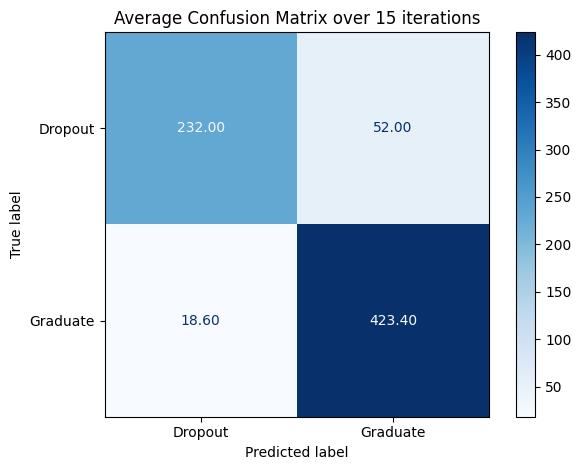

In [5]:
import pandas as pd
import numpy as np
import optuna
import joblib
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt

# === 1. Load and prepare data ===
df = pd.read_csv("predict_students_dropout_and_academic_success.csv")
df = df[df["Target"] != "Enrolled"]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

# === 2. Load best Optuna study ===
study = optuna.load_study(study_name="no-name-7d86f460-e62a-450d-ad4f-d09a17fa12dc", 
                          storage="sqlite:///random_forest_scaler.db")
best_trial = study.best_trial

# === 3. Define scaler options ===
scaler_options = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "ordinal": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    "none": 'passthrough'
}

# === 4. Rebuild pipeline based on best trial ===
transformers = []
for col in X.columns:
    key = f"scaler_{col}"
    scaler_name = best_trial.params.get(key, "none")
    transformers.append((f"{col}_scaler", scaler_options[scaler_name], [col]))

preprocessor = ColumnTransformer(transformers)

# === 5. Evaluate RandomForest with selected preprocessing 15 times ===
dropout_f1_score_values = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))

for index in range(15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    model = RandomForestClassifier()
    pipeline = Pipeline([
        ("scaler", preprocessor),
        ("classifier", model)
    ])

    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_f1_score_values.append(dropout_f1_score)
    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm
# === 6. Print results ===
print("Random Forest (Optuna-selected scalers, without 'Enrolled')")
print("Dropout F1 Score (mean):", np.mean(dropout_f1_score_values))
print("Dropout F1 Score (var):", np.var(dropout_f1_score_values))

statistic, pvalue = wilcoxon(dropout_f1_score_values)
print("Wilcoxon p-value:", pvalue)

print(classification_report(y_test, preds, target_names=le.classes_))

avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Average Confusion Matrix over 15 iterations")
plt.tight_layout()
plt.show()


Como vimos no resultado anteior, não obtivemos um resultado satisfatório utilizando os três métodos juntos com o Optuna

Tentaremos utilizar de forma separada para analisar o desempenho

Scaler

In [ ]:
import numpy as np
import pandas as pd
import optuna
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === Load dataset ===
df = pd.read_csv("predict_students_dropout_and_academic_success.csv")
df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
le = LabelEncoder()
y = le.fit_transform(y)

# === Load best trial from database ===
study = optuna.load_study(
    study_name="no-name-4edeb741-7c80-4857-9a8a-47563ca4f188",
    storage="sqlite:///scaler.db"
)
best_trial = study.best_trial

# === Rebuild pipeline with best scalers ===
scaler_options = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "ordinal": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    "none": "passthrough"
}

transformers = []
for col in X.columns:
    scaler_key = best_trial.params.get(f"scaler_{col}", "none")
    transformers.append((f"{col}_scaler", scaler_options[scaler_key], [col]))

col_transformer = ColumnTransformer(transformers)
model = RandomForestClassifier()
pipe = Pipeline([("scaler", col_transformer), ("classifier", model)])

# === Evaluation over 15 runs ===
dropout_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))

for index in range(15):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=index  # ensure reproducibility
    )

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_scores.append(dropout_f1_score)

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm
    print(f"Iteration {index+1} - Dropout F1 Score: {dropout_f1_score:.4f}")

# === Summary ===
print("\n=== Summary over 15 iterations ===")
print(f"Mean Dropout F1 Score: {np.mean(dropout_scores):.4f}")
print(f"Std Dev: {np.std(dropout_scores):.4f}")
print(f"Min: {np.min(dropout_scores):.4f}, Max: {np.max(dropout_scores):.4f}")

# === Plot averaged confusion matrix ===
avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Average Confusion Matrix of Best Optuna Trial for Scaler")
plt.show()


PCA

In [ ]:
import pandas as pd
import numpy as np
import optuna
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === Load the dataset ===
df = pd.read_csv('predict_students_dropout_and_academic_success.csv')
df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

# === Load the study ===
study = optuna.load_study(
    study_name="no-name-4edeb741-7c80-4857-9a8a-47563ca4f188",
    storage="sqlite:///pca.db"
)

best_params = study.best_trial.params

# === Reconstruct the pipeline using the best params ===
n_components = best_params["pca__n_components"]
svd_solver = best_params["pca__svd_solver"]
whiten = best_params["pca__whiten"]

# Adjust if using arpack
if svd_solver == "arpack":
    n_components = min(n_components, X.shape[1] - 1)

pca = PCA(
    n_components=n_components,
    svd_solver=svd_solver,
    whiten=whiten
)

model = RandomForestClassifier()

pipe = Pipeline([
    ("pca", pca),
    ("classifier", model)
])

# === Evaluation over 15 runs ===
dropout_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))

for index in range(15):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=index  # ensure reproducibility
    )

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_scores.append(dropout_f1_score)

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm

    print(f"Iteration {index+1} - Dropout F1 Score: {dropout_f1_score:.4f}")

# === Summary ===
print("\n=== Summary over 15 iterations ===")
print(f"Mean Dropout F1 Score: {np.mean(dropout_scores):.4f}")
print(f"Std Dev: {np.std(dropout_scores):.4f}")
print(f"Min: {np.min(dropout_scores):.4f}, Max: {np.max(dropout_scores):.4f}")

# === Plot averaged confusion matrix ===
avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Average Confusion Matrix of Best Optuna Trial for PCA")
plt.show()

RFE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import optuna

# === Load dataset ===
df = pd.read_csv('predict_students_dropout_and_academic_success.csv')
df = df[df["Target"] != "Enrolled"]  # remove "Enrolled" class

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

# === Load best study from database ===
study_name = "no-name-4edeb741-7c80-4857-9a8a-47563ca4f188"
storage = "sqlite:///rfe.db"

study = optuna.load_study(study_name=study_name, storage=storage)
best_params = study.best_params

# === Rebuild the pipeline using best trial parameters ===
model = RandomForestClassifier()
rfe = RFE(
    estimator=model,
    n_features_to_select=best_params["rfe__n_features_to_select"],
    step=best_params["rfe__step"]
)
pipe = Pipeline([
    ("rfe", rfe),
    ("classifier", model)
])

# === Evaluation over 15 iterations ===
dropout_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))  # accumulator

for index in range(15):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y
    )

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_scores.append(dropout_f1_score)

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm

    print(f"Iteration {index+1} - Dropout F1 Score: {dropout_f1_score:.4f}")

# === Summary Statistics ===
print("\n=== Summary over 15 iterations ===")
print(f"Mean Dropout F1 Score: {np.mean(dropout_scores):.4f}")
print(f"Std Dev: {np.std(dropout_scores):.4f}")
print(f"Min: {np.min(dropout_scores):.4f}, Max: {np.max(dropout_scores):.4f}")

# === Averaged Confusion Matrix ===
avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Average Confusion Matrix over 15 iterations")
plt.tight_layout()
plt.show()


Scaler, PCA e RFE 

In [ ]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === Load and preprocess dataset ===
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')
df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

# === Retrieve best study trial ===
study = optuna.load_study(
    study_name="no-name-4edeb741-7c80-4857-9a8a-47563ca4f188",
    storage="sqlite:///scaler_pca_rfe.db"
)

best_trial = study.best_trial

# === Reconstruct the pipeline from best trial ===
transformers = []
scaler_options = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "ordinal": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    "none": 'passthrough'
}

for col in X.columns:
    scaler_choice = best_trial.params.get(f"scaler_{col}", "none")
    transformers.append((f"{col}_scaler", scaler_options[scaler_choice], [col]))

col_transformer = ColumnTransformer(transformers)
steps = [("scaler", col_transformer)]

# === Optionally add PCA ===
if best_trial.params.get("pca_usage") == "pca":
    pca = PCA(
        n_components=best_trial.params["pca__n_components"],
        svd_solver=best_trial.params["pca__svd_solver"],
        whiten=best_trial.params["pca__whiten"]
    )
    steps.append(("pca", pca))

# === Optionally add RFE ===
model = RandomForestClassifier()
if best_trial.params.get("rfe_usage") == "rfe":
    rfe = RFE(
        estimator=model,
        n_features_to_select=best_trial.params["rfe__n_features_to_select"],
        step=best_trial.params["rfe__step"]
    )
    steps.append(("rfe", rfe))

# === Final classifier ===
steps.append(("classifier", model))
pipe = Pipeline(steps)

# === Evaluation over 15 iterations ===
dropout_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))

for index in range(15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    f1_score_per_class = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_f1_score = f1_score_per_class[dropout_index]
    dropout_scores.append(dropout_f1_score)

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm

    print(f"Iteration {index + 1} - Dropout F1 Score: {dropout_f1_score:.4f}")

# === Summary Statistics ===
print("\n=== Summary over 15 iterations ===")
print(f"Mean Dropout F1 Score: {np.mean(dropout_scores):.4f}")
print(f"Std Dev: {np.std(dropout_scores):.4f}")
print(f"Min: {np.min(dropout_scores):.4f}, Max: {np.max(dropout_scores):.4f}")

# === Averaged Confusion Matrix ===
avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Average Confusion Matrix of Best Optuna Trial for RFE")
plt.show()


XGBoost

In [ ]:
import pandas as pd
import numpy as np
import optuna
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load and preprocess dataset
df = pd.read_csv('predict_students_dropout_and_academic_success.csv')
df = df[df["Target"] != "Enrolled"]

X = df.drop(columns="Target")
y = df["Target"]

le = LabelEncoder()
y = le.fit_transform(y)

# === Load best Optuna study ===
study = optuna.load_study(
    study_name="xgboost_pipeline",
    storage="sqlite:///xgboost_pipeline.db"
)
best_trial = study.best_trial

# === Rebuild pipeline ===
scaler_options = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "ordinal": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    "none": 'passthrough'
}

# Column Transformer
transformers = []
for col in X.columns:
    scaler_choice = best_trial.params.get(f"scaler_{col}", "none")
    transformers.append((f"{col}_scaler", scaler_options[scaler_choice], [col]))

col_transformer = ColumnTransformer(transformers)
steps = [("scaler", col_transformer)]

# PCA
if best_trial.params.get("pca_usage") == "pca":
    steps.append(("pca", PCA(
        n_components=best_trial.params["pca__n_components"],
        svd_solver=best_trial.params["pca__svd_solver"],
        whiten=best_trial.params["pca__whiten"]
    )))

# Model
model = XGBClassifier(
    n_estimators=best_trial.params["n_estimators"],
    max_depth=best_trial.params["max_depth"],
    learning_rate=best_trial.params["learning_rate"],
    subsample=best_trial.params["subsample"],
    colsample_bytree=best_trial.params["colsample_bytree"],
    gamma=best_trial.params["gamma"],
    reg_alpha=best_trial.params["reg_alpha"],
    reg_lambda=best_trial.params["reg_lambda"],
    use_label_encoder=False,
    eval_metric="mlogloss",
    verbosity=0
)

# RFE
if best_trial.params.get("rfe_usage") == "rfe":
    rfe = RFE(
        estimator=model,
        n_features_to_select=best_trial.params["rfe__n_features_to_select"],
        step=best_trial.params["rfe__step"]
    )
    steps.append(("rfe", rfe))

steps.append(("classifier", model))
pipe = Pipeline(steps)

# === Evaluate best pipeline ===
dropout_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))

for i in range(15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    f1s = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_scores.append(f1s[dropout_index])

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm

    print(f"Iteration {i+1} - Dropout F1 Score: {f1s[dropout_index]:.4f}")

# === Summary statistics ===
print("\n=== Summary over 15 iterations ===")
print(f"Mean Dropout F1 Score: {np.mean(dropout_scores):.4f}")
print(f"Std Dev: {np.std(dropout_scores):.4f}")
print(f"Min: {np.min(dropout_scores):.4f}, Max: {np.max(dropout_scores):.4f}")

# === Average Confusion Matrix ===
avg_cm = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_cm, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Average Confusion Matrix of Best XGBoost Trial")
plt.show()


Catboost

In [ ]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

# === Load and preprocess dataset ===
df = pd.read_csv(r'predict_students_dropout_and_academic_success.csv')
df = df[df["Target"] != "Enrolled"]

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

# === Retrieve best Optuna trial for CatBoost ===
study = optuna.load_study(
    study_name="catboost_pipeline",  # Replace with your actual CatBoost study name
    storage="sqlite:///catboost_pipeline.db"
)

best_trial = study.best_trial

# === Reconstruct the pipeline ===
transformers = []
scaler_options = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "ordinal": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    "none": 'passthrough'
}

for col in X.columns:
    scaler_choice = best_trial.params.get(f"scaler_{col}", "none")
    transformers.append((f"{col}_scaler", scaler_options[scaler_choice], [col]))

col_transformer = ColumnTransformer(transformers)
steps = [("scaler", col_transformer)]

# === Optional PCA ===
if best_trial.params.get("pca_usage") == "pca":
    steps.append(("pca", PCA(
        n_components=best_trial.params["pca__n_components"],
        svd_solver=best_trial.params["pca__svd_solver"],
        whiten=best_trial.params["pca__whiten"]
    )))

# === CatBoost Classifier with best parameters ===
model = CatBoostClassifier(
    iterations=best_trial.params["iterations"],
    depth=best_trial.params["depth"],
    learning_rate=best_trial.params["learning_rate"],
    l2_leaf_reg=best_trial.params["l2_leaf_reg"],
    # subsample=best_trial.params["subsample"],
    random_strength=best_trial.params["random_strength"],
    verbose=0
)

# === Optional RFE ===
if best_trial.params.get("rfe_usage") == "rfe":
    steps.append(("rfe", RFE(
        estimator=model,
        n_features_to_select=best_trial.params["rfe__n_features_to_select"],
        step=best_trial.params["rfe__step"]
    )))

steps.append(("classifier", model))
pipe = Pipeline(steps)

# === Evaluate the pipeline ===
dropout_scores = []
conf_matrix_total = np.zeros((len(le.classes_), len(le.classes_)))

for i in range(15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    f1_scores = f1_score(y_test, preds, average=None)
    dropout_index = le.transform(["Dropout"])[0]
    dropout_scores.append(f1_scores[dropout_index])

    cm = confusion_matrix(y_test, preds, labels=np.arange(len(le.classes_)))
    conf_matrix_total += cm

    print(f"Iteration {i+1} - Dropout F1 Score: {f1_scores[dropout_index]:.4f}")

# === Summary Statistics ===
print("\n=== Summary over 15 iterations ===")
print(f"Mean Dropout F1 Score: {np.mean(dropout_scores):.4f}")
print(f"Std Dev: {np.std(dropout_scores):.4f}")
print(f"Min: {np.min(dropout_scores):.4f}, Max: {np.max(dropout_scores):.4f}")

# === Averaged Confusion Matrix ===
avg_conf_matrix = conf_matrix_total / 15
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Average Confusion Matrix of Best Optuna CatBoost Trial")
plt.show()
